In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import math
pd.set_option('display.max_columns', 500)

In [2]:
all_pitching = pd.read_csv('Pitching.csv')
all_salaries = pd.read_csv('Salaries.csv')
all_people=pd.read_csv('People.csv')

In [3]:
all_pitching

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,0,0,78,43,23,0,11,1,NaN,7.96,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,0,0,792,361,132,4,37,13,NaN,4.50,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,0,0,3,8,3,0,0,0,NaN,27.00,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,1,0,639,295,103,3,31,15,NaN,4.35,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,0,0,27,20,10,0,3,0,NaN,10.00,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47623,zamorda01,2019,1,NYN,NL,0,1,17,0,0,0,0,26,10,5,1,5,8,0.294,5.19,1.0,0,1.0,0,41.0,3,5,0.0,1.0,0.0
47624,zeuchtj01,2019,1,TOR,AL,1,2,5,3,0,0,0,68,22,12,2,11,20,0.250,4.76,0.0,2,0.0,0,99.0,0,13,0.0,0.0,1.0
47625,zimmejo02,2019,1,DET,AL,1,13,23,23,0,0,0,336,145,86,19,25,82,0.311,6.91,2.0,3,6.0,0,504.0,0,89,3.0,4.0,5.0
47626,zimmeky01,2019,1,KCA,AL,0,1,15,0,0,0,0,55,28,22,2,19,18,0.337,10.80,0.0,2,0.0,0,102.0,3,22,0.0,0.0,1.0


In [4]:
yearly_average_salary = all_salaries.groupby('yearID').mean()

## Average mlb player salary grows exponentially since 1985

Text(0.5, 0, '')

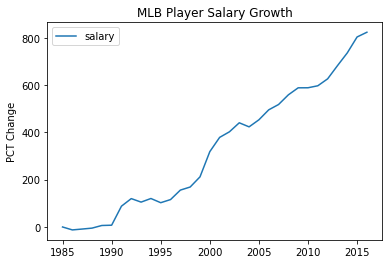

In [5]:
yearly_salary_pct_change = 100.0 *  (yearly_average_salary - yearly_average_salary.iloc[0]) / yearly_average_salary.iloc[0]
yearly_salary_pct_change.plot()
plt.title('MLB Player Salary Growth')
plt.ylabel('PCT Change'); plt.xlabel('')

In [6]:
all_people=all_people[['playerID','throws']]

In [7]:
all_people

,playerID,throws
0,aardsda01,R
1,aaronha01,R
2,aaronto01,R
3,aasedo01,R
4,abadan01,L
...,...,...
20085,zupofr01,R
20086,zuvelpa01,R
20087,zuverge01,R
20088,zwilldu01,L


## Merge handedness to pitcher dataset

In [8]:
df=pd.merge(all_pitching, all_people, left_on='playerID', right_on='playerID', how='left')

## WHIP = (BB + H) / (IPOuts / 3)

The average number of base runners a pitcher allows per inning

In [9]:
df['WHIP']=(df['BB']+df['H'])/(df['IPouts']/3)

## Merge salary data to pitcher dataset

In [10]:
all_salaries=all_salaries[['yearID','playerID','salary']]

In [11]:
all_salaries

,yearID,playerID,salary
0,1985,barkele01,870000
1,1985,bedrost01,550000
2,1985,benedbr01,545000
3,1985,campri01,633333
4,1985,ceronri01,625000
...,...,...,...
26423,2016,strasst01,10400000
26424,2016,taylomi02,524000
26425,2016,treinbl01,524900
26426,2016,werthja01,21733615


In [12]:
df=df.merge(all_salaries, on=['yearID','playerID'])

In [13]:
df

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,throws,WHIP,salary
0,ackerji01,1985,1,TOR,AL,7,2,61,0,0,0,10,259,86,31,7,43,42,0.268,3.23,1.0,2,3.0,0,370.0,26,35,1.0,2.0,16.0,R,1.494208,170000
1,agostju01,1985,1,CHA,AL,4,3,54,0,0,0,1,181,45,24,3,23,39,0.210,3.58,1.0,0,3.0,0,246.0,21,27,3.0,3.0,4.0,L,1.127072,147500
2,alexado01,1985,1,TOR,AL,17,10,36,36,6,1,0,782,268,100,28,67,142,0.266,3.45,0.0,9,6.0,0,1090.0,0,105,6.0,3.0,15.0,R,1.285166,875000
3,allenne01,1985,1,SLN,NL,1,4,23,1,0,0,2,87,32,18,3,17,10,0.283,5.59,6.0,1,1.0,1,135.0,13,22,1.0,3.0,3.0,R,1.689655,750000
4,allenne01,1985,2,NYA,AL,1,0,17,0,0,0,1,88,26,9,1,13,16,0.234,2.76,0.0,2,0.0,0,124.0,10,9,0.0,0.0,3.0,R,1.329545,750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13360,youngch03,2016,1,KCA,AL,3,9,34,13,0,0,1,266,104,61,28,43,94,0.291,6.19,1.0,3,1.0,0,406.0,7,63,0.0,4.0,3.0,R,1.657895,4250000
13361,zieglbr01,2016,1,ARI,NL,2,3,36,0,0,0,18,115,41,12,1,15,27,0.281,2.82,5.0,0,2.0,0,165.0,30,13,1.0,1.0,10.0,R,1.460870,5500000
13362,zieglbr01,2016,2,BOS,AL,2,4,33,0,0,0,4,89,26,5,1,11,31,0.234,1.52,2.0,1,1.0,0,124.0,12,8,1.0,0.0,6.0,R,1.247191,5500000
13363,zimmejo02,2016,1,DET,AL,9,7,19,18,0,0,0,316,118,57,14,26,66,0.284,4.87,0.0,3,2.0,0,450.0,1,63,1.0,5.0,8.0,R,1.367089,18000000


## Choose data from 2012-2016

In [14]:
df=df[(df['yearID']==2012)|(df['yearID']==2013)|(df['yearID']==2014) | (df['yearID']==2015) | (df['yearID']==2016)]

In [15]:
df=df.dropna()
df["throws"]=np.where((df['throws'] == 'L'), "Left", "Right")

In [16]:
df_right=df[(df['throws']=='Right')]
df_left=df[(df['throws']=='Left')]

## Right and Left handed Pitcher Salary visualization

Text(0.5, 1.0, 'L Handed Pitcher 2016 Salary Distribution (million)')

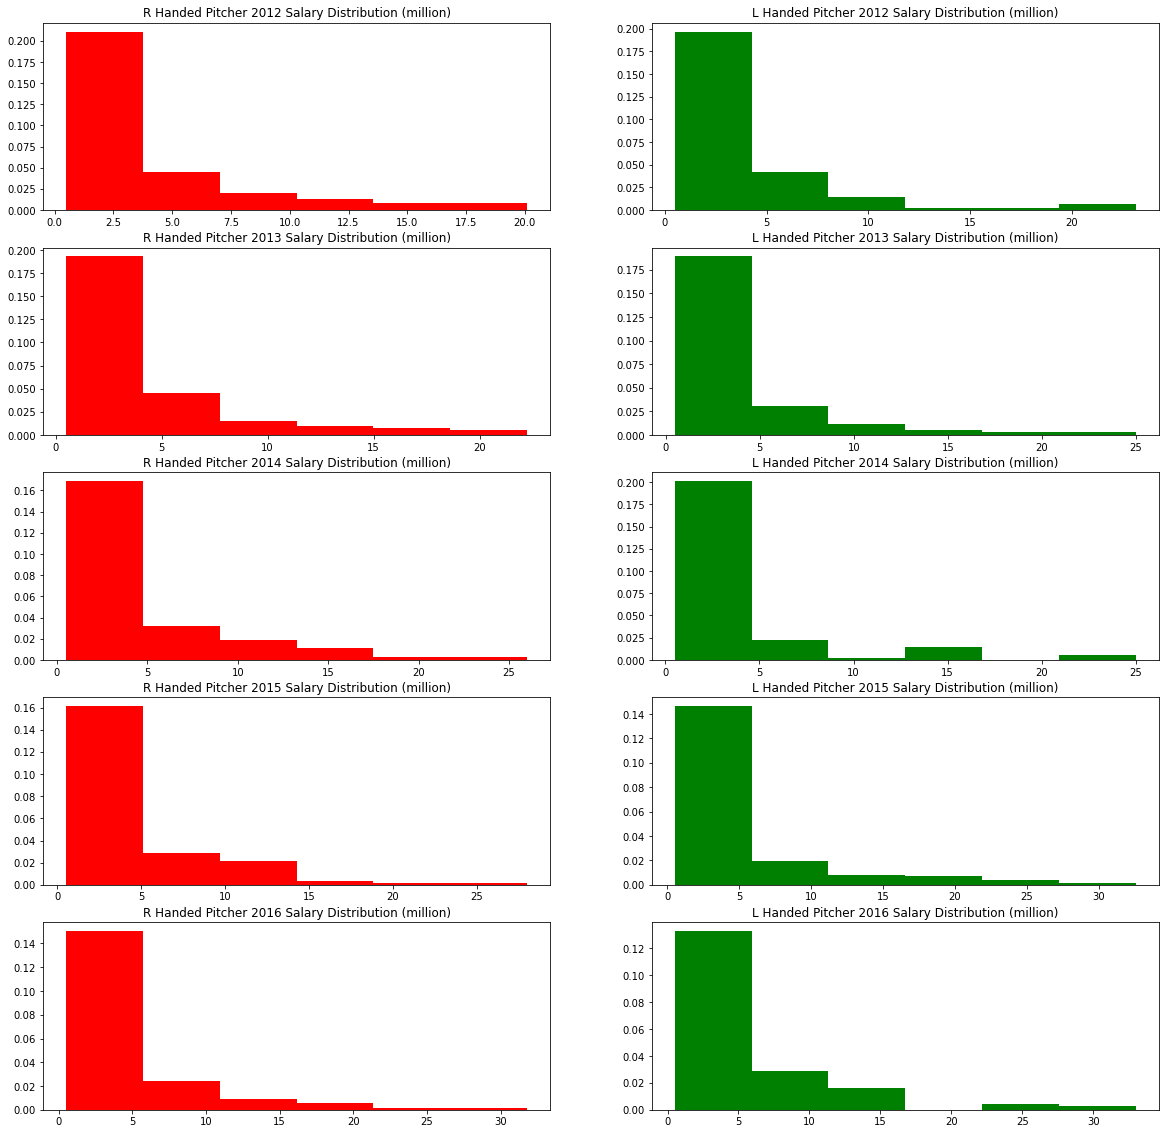

In [17]:
%matplotlib inline
COL_NUM = 2
ROW_NUM = 5
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(20,20))
n_bins=6
ax0, ax1, ax2, ax3,ax4,ax5,ax6,ax7,ax8,ax9 = axes.flatten()

ax0.hist((df_right.loc[(df_right['yearID']==2012),'salary']/1e6), n_bins, density=True, histtype='bar', color='r')
ax0.set_title('R Handed Pitcher 2012 Salary Distribution (million)')
ax1.hist((df_left.loc[(df_left['yearID']==2012),'salary']/1e6), n_bins, density=True, histtype='bar', color='g')
ax1.set_title('L Handed Pitcher 2012 Salary Distribution (million)')

ax2.hist((df_right.loc[(df_right['yearID']==2013),'salary']/1e6), n_bins, density=True, histtype='bar', color='r')
ax2.set_title('R Handed Pitcher 2013 Salary Distribution (million)')
ax3.hist((df_left.loc[(df_left['yearID']==2013),'salary']/1e6), n_bins, density=True, histtype='bar', color='g')
ax3.set_title('L Handed Pitcher 2013 Salary Distribution (million)')

ax4.hist((df_right.loc[(df_right['yearID']==2014),'salary']/1e6), n_bins, density=True, histtype='bar', color='r')
ax4.set_title('R Handed Pitcher 2014 Salary Distribution (million)')
ax5.hist((df_left.loc[(df_left['yearID']==2014),'salary']/1e6), n_bins, density=True, histtype='bar', color='g')
ax5.set_title('L Handed Pitcher 2014 Salary Distribution (million)')

ax6.hist((df_right.loc[(df_right['yearID']==2015),'salary']/1e6), n_bins, density=True, histtype='bar', color='r')
ax6.set_title('R Handed Pitcher 2015 Salary Distribution (million)')
ax7.hist((df_left.loc[(df_left['yearID']==2015),'salary']/1e6), n_bins, density=True, histtype='bar', color='g')
ax7.set_title('L Handed Pitcher 2015 Salary Distribution (million)')

ax8.hist((df_right.loc[(df_right['yearID']==2016),'salary']/1e6), n_bins, density=True, histtype='bar', color='r')
ax8.set_title('R Handed Pitcher 2016 Salary Distribution (million)')
ax9.hist((df_left.loc[(df_left['yearID']==2016),'salary']/1e6), n_bins, density=True, histtype='bar', color='g')
ax9.set_title('L Handed Pitcher 2016 Salary Distribution (million)')



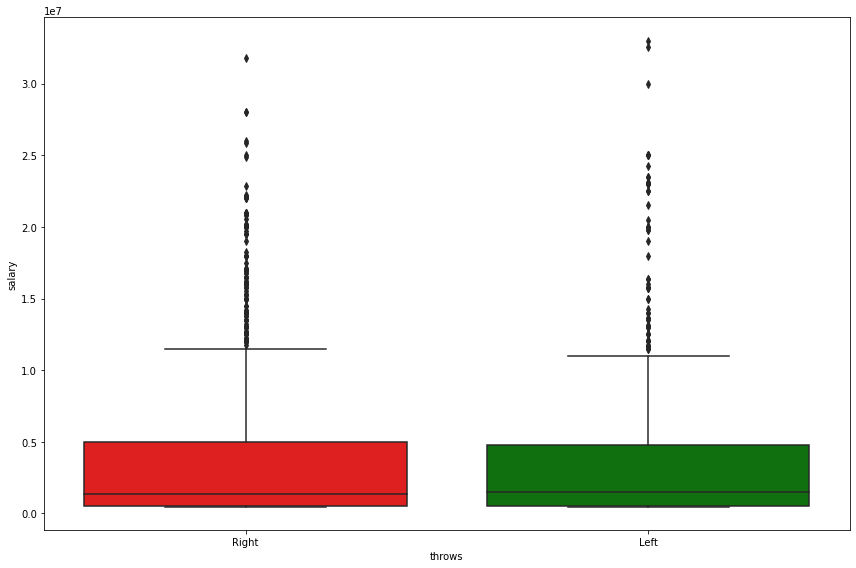

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df["throws"],y=df["salary"],data=df,palette=["r","g"])
plt.tight_layout()

In [19]:
r_2012=df_right.loc[(df_right['yearID']==2012),'salary'].mean()
r_2013=df_right.loc[(df_right['yearID']==2013),'salary'].mean()
r_2014=df_right.loc[(df_right['yearID']==2014),'salary'].mean()
r_2015=df_right.loc[(df_right['yearID']==2015),'salary'].mean()
r_2016=df_right.loc[(df_right['yearID']==2016),'salary'].mean()

In [20]:
l_2012=df_left.loc[(df_left['yearID']==2012),'salary'].mean()
l_2013=df_left.loc[(df_left['yearID']==2013),'salary'].mean()
l_2014=df_left.loc[(df_left['yearID']==2014),'salary'].mean()
l_2015=df_left.loc[(df_left['yearID']==2015),'salary'].mean()
l_2016=df_left.loc[(df_left['yearID']==2016),'salary'].mean()

Text(0.5, 1.0, 'Average Pitcher Salary by hand')

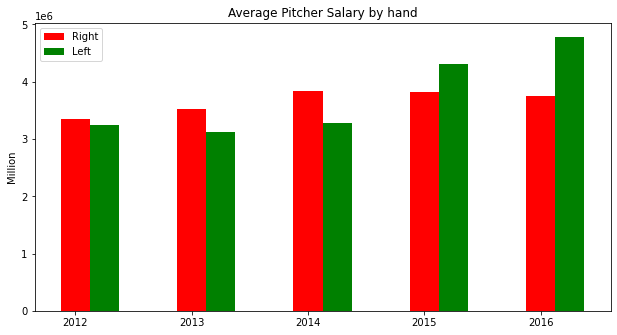

In [21]:
data = [[r_2012,r_2013,r_2014, r_2015, r_2016],[l_2012,l_2013,l_2014,l_2015,l_2016]]
X = np.arange(5)
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([0,0,1,1])
plt.xticks(range(5), ['2012','2013','2014','2015','2016'],fontsize=10)
ax.bar(X + 0.00, data[0], color = 'r', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.legend(labels=['Right', 'Left'])
plt.ylabel('Million')
plt.title('Average Pitcher Salary by hand')

## Correlation between 2016 R hand pitcher Salary VS  Wins, Strikeouts, ERA and WHIP 

The correlation between W and salary is 0.361
The correlation between SO and salary is 0.330
The correlation between ERA and salary is -0.020
The correlation between WHIP and salary is -0.053


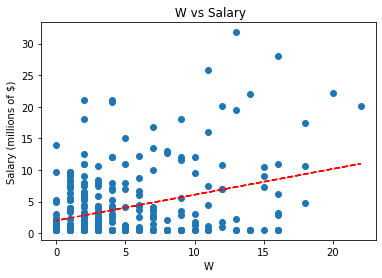

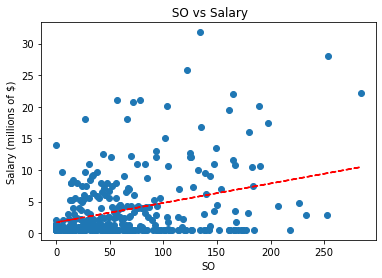

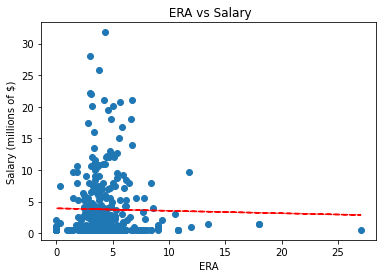

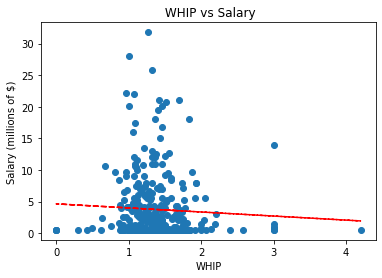

In [22]:
def analyze(record_df, statistics_list):
    for statistic in statistics_list:
        x = record_df[statistic]
        y = record_df['salary'] / 1e6
        plt.figure()
        plt.scatter(x,y)
        plt.title(' {} vs Salary'.format(statistic))
        plt.ylabel('Salary (millions of $)')
        plt.xlabel('{}'.format(statistic))
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        plt.plot(x, p(x), 'r--')
        print('The correlation between {} and salary is {:0.3f}' \
         .format(statistic, record_df.corr()['salary'][statistic]))

analyze(df_right.loc[(df_right['yearID']==2016)], ['W', 'SO', 'ERA','WHIP'])

## Correlation between 2016 L hand pitcher Salary VS  Wins, Strikeouts, ERA and WHIP 

The correlation between W and salary is 0.541
The correlation between SO and salary is 0.490
The correlation between ERA and salary is -0.094
The correlation between WHIP and salary is -0.135


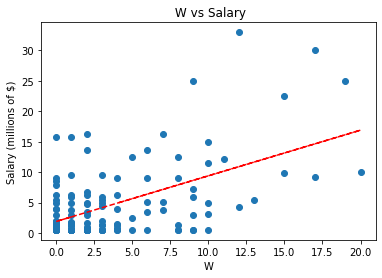

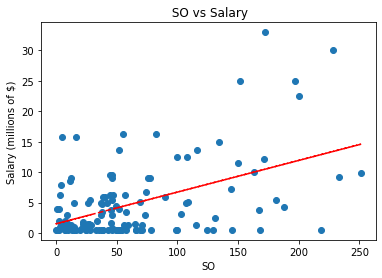

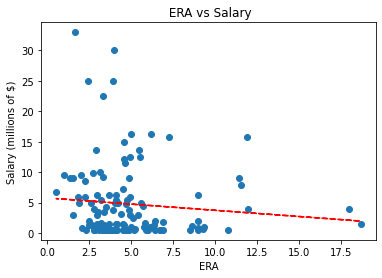

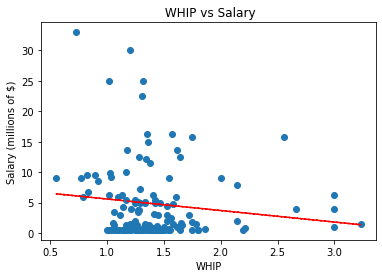

In [23]:
analyze(df_left.loc[(df_left['yearID']==2016)], ['W', 'SO', 'ERA','WHIP'])

In [24]:
df['hand']=np.where((df['throws']=='Left'),1,0)

# Regression Model Results

1. The data has a lot of noise in it.


2. Losses  predict a higher salary. That may be because losses denote starting pitchers and starting pitchers are much more likely to take a loss than a reliever. 


3. Games pitched predicts lower salary but that’s probably because Relievers can show more games a year than starting pitchers.

In [25]:
from statsmodels.formula.api import ols

fit = ols('salary ~ C(hand)+W+L+G+IPouts+BAOpp+BB+SO+GS+SHO+SV+H+ER+HR+IBB+R+WHIP', data=df).fit() 
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     36.33
Date:                Fri, 11 Dec 2020   Prob (F-statistic):          2.53e-105
Time:                        15:44:34   Log-Likelihood:                -37441.
No. Observations:                2242   AIC:                         7.492e+04
Df Residuals:                    2224   BIC:                         7.502e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.959e+06   5.14e+05      5.752      0.000    1.95e+06    3.97e+06
C(hand)[T.1]  4.873e+05    2.1e+05      2.318      0.021     7.5e+04       9e+05
W             1.308e+05   5.57e+04      2.351      0.019    2.17e+04     2.4e+05
L             2.884e+04   5.89e+04      0.489      0.625   -8.67e+04    1.44e+05
G            -3.318e+04   1.24e+04     -2.678      0.007   -5.75e+04   -8879.899
IPouts        3018.9038   5694.264      0.530      0.596   -8147.725    1.42e+04
BAOpp         1.177e+06   2.48e+06      0.475      0.635   -3.68e+06    6.03e+06
BB           -7.369e+04   1.34e+04     -5.501      0.000      -1e+05   -4.74e+04
SO            1.996e+04   6386.075      3.125      0.002    7433.732    3.25e+04
GS            4.758e+04   6.21e+04      0.767      0.443   -7.41e+04    1.69e+05
SHO           8.203e+05   2.68e+05      3.063      0.002    2.95e+05    1.35e+06
SV            9.006e+04    1.3e+04      6.927      0.000    6.46e+04    1.16e+05
H            -2.501e+04   1.47e+04     -1.695      0.090   -5.39e+04    3918.521
ER            1.203e+04   4.51e+04      0.267      0.790   -7.64e+04       1e+05
HR            2.052e+04   3.24e+04      0.633      0.527   -4.31e+04    8.41e+04
IBB          -1.562e+05   6.43e+04     -2.429      0.015   -2.82e+05   -3.01e+04
R             4.998e+04   4.41e+04      1.134      0.257   -3.64e+04    1.36e+05
WHIP         -3.605e+05   2.69e+05     -1.340      0.180   -8.88e+05    1.67e+05
==============================================================================
Omnibus:                      697.041   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2265.427
Skew:                           1.557   Prob(JB):                         0.00
Kurtosis:                       6.815   Cond. No.                     9.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## T test not significant

In [26]:
from scipy.stats import ttest_ind

In [27]:
ttest_ind(df_left['salary'],df_right['salary'])

Ttest_indResult(statistic=0.394743227680977, pvalue=0.6930699784727188)

## Slice the data

1. Definition of Relief Pitchers (pitchers who have not started any games in the season)



2. In baseball, before a player enters the free agency (typically after six years after debut), he is almost certain to be underpaid. (for the first 3 years that a player is in the majors, he basically makes the league minimum (around 500k)) after that he goes through 3 years of salary arbitration where his pay rises each year



3. So we only look at “Established Players” (seasons that are more than 6 years after the player’s debut year) to get more of a fair value of what the pitchers is worth.


4. Since we are slicing the data, we looked at a longer time period (2005-2016)


In [28]:
all_people_2=pd.read_csv('People.csv')
all_people_2

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20085,zupofr01,1939.0,8.0,29.0,USA,CA,San Francisco,2005.0,3.0,25.0,USA,CA,Burlingame,Frank,Zupo,Frank Joseph,182.0,71.0,L,R,1957-07-01,1961-05-09,zupof101,zupofr01
20086,zuvelpa01,1958.0,10.0,31.0,USA,CA,San Mateo,NaN,NaN,NaN,NaN,NaN,NaN,Paul,Zuvella,Paul,173.0,72.0,R,R,1982-09-04,1991-05-02,zuvep001,zuvelpa01
20087,zuverge01,1924.0,8.0,20.0,USA,MI,Holland,2014.0,9.0,8.0,USA,AZ,Tempe,George,Zuverink,George,195.0,76.0,R,R,1951-04-21,1959-06-15,zuveg101,zuverge01
20088,zwilldu01,1888.0,11.0,2.0,USA,MO,St. Louis,1978.0,3.0,27.0,USA,CA,La Crescenta,Dutch,Zwilling,Edward Harrison,160.0,66.0,L,L,1910-08-14,1916-07-12,zwild101,zwilldu01


In [29]:
all_people_2=pd.read_csv('People.csv')
all_pitching_2 = pd.read_csv('Pitching.csv')
all_salaries_2 = pd.read_csv('Salaries.csv')

In [30]:
all_people_2=all_people_2[['playerID','throws','debut']]

In [31]:
df_2=pd.merge(all_pitching_2, all_people_2, left_on='playerID', right_on='playerID', how='left')

In [32]:
df_2['WHIP']=(df_2['BB']+df_2['H'])/(df_2['IPouts']/3)
all_salaries_2=all_salaries_2[['yearID','playerID','salary']]
df_2=df_2.merge(all_salaries, on=['yearID','playerID'])

In [33]:
df_2=df_2[(df_2['yearID']==2005)|(df_2['yearID']==2006)|(df_2['yearID']==2007)|(df_2['yearID']==2008)|(df_2['yearID']==2009)|(df_2['yearID']==2010)|(df_2['yearID']==2011)|(df_2['yearID']==2012)|(df_2['yearID']==2013)|(df_2['yearID']==2014) | (df_2['yearID']==2015) | (df_2['yearID']==2016)]
df_2=df_2.dropna()
df_2["throws"]=np.where((df_2['throws'] == 'L'), "Left", "Right")

In [34]:
df_2['Debut']=df_2['debut'].apply(lambda x:x.split(['-'][0])) 

In [35]:
df_2['Debut']=df_2['Debut'].apply(lambda x:x[0]) 

In [36]:
df_2['Debut'] = df_2['Debut'].astype(int)

In [37]:
df_2['yearID'] = df_2['yearID'].astype(int)

In [38]:
df_2['Threshold']=df_2['yearID']-df_2['Debut']

In [39]:
df_2=df_2[(df_2['Threshold']>=6)]

In [40]:
del df_2['debut']

In [41]:
df_2

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,throws,WHIP,salary,Debut,Threshold
8102,adamste01,2005,1,PHI,NL,0,2,16,0,0,0,0,40,25,19,3,10,4,0.403,12.83,2.0,0,4.0,0,77.0,5,19,1.0,0.0,2.0,Right,2.625000,500000,1995,10
8104,alfonan01,2005,1,FLO,NL,1,1,33,0,0,0,0,82,29,15,2,14,16,0.299,4.94,4.0,1,2.0,0,118.0,1,15,3.0,2.0,6.0,Right,1.573171,300000,1997,8
8105,almanca01,2005,1,TEX,AL,0,0,6,0,0,0,0,15,10,8,2,7,3,0.435,14.40,0.0,4,1.0,0,33.0,2,8,0.0,2.0,0.0,Right,3.400000,1100000,1997,8
8106,alvarwi01,2005,1,LAN,NL,1,4,21,2,0,0,0,72,31,15,7,7,16,0.316,5.63,0.0,0,0.0,0,109.0,3,15,2.0,2.0,1.0,Left,1.583333,2000000,1989,16
8107,anderbr02,2005,1,KCA,AL,1,2,6,6,0,0,0,92,39,23,7,4,17,0.305,6.75,1.0,0,0.0,1,133.0,0,24,0.0,1.0,2.0,Left,1.402174,3250000,1993,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13356,worleva01,2016,1,BAL,AL,2,2,35,4,0,0,1,260,84,34,11,35,56,0.261,3.53,0.0,3,3.0,0,365.0,13,37,0.0,3.0,12.0,Right,1.373077,2600000,2010,6
13360,youngch03,2016,1,KCA,AL,3,9,34,13,0,0,1,266,104,61,28,43,94,0.291,6.19,1.0,3,1.0,0,406.0,7,63,0.0,4.0,3.0,Right,1.657895,4250000,2004,12
13361,zieglbr01,2016,1,ARI,NL,2,3,36,0,0,0,18,115,41,12,1,15,27,0.281,2.82,5.0,0,2.0,0,165.0,30,13,1.0,1.0,10.0,Right,1.460870,5500000,2008,8
13362,zieglbr01,2016,2,BOS,AL,2,4,33,0,0,0,4,89,26,5,1,11,31,0.234,1.52,2.0,1,1.0,0,124.0,12,8,1.0,0.0,6.0,Right,1.247191,5500000,2008,8


In [42]:
df_2_relief=df_2[(df_2['GS']==0)]
df_2_starter=df_2[(df_2['GS']!=0)]

## Right & Left Starter Salary Analysis (2005-2016)

In [43]:
df_right_starter=df_2_starter[(df_2_starter['throws']=='Right')]
df_left_starter=df_2_starter[(df_2_starter['throws']=='Left')]

In [44]:
def plot(data,year_list):
    for year in year_list:
        plt.hist((data.loc[(data['yearID']==year),'salary']/1e6), bins=6, color='r', edgecolor='black', linewidth=1.2, align='mid')
        plt.xlabel('Salary (millions of $)'), plt.ylabel('Count')
        plt.title('{} R Handed Starting Pitcher Salary Distribution'.format(year), size = 14)
        plt.show()

        

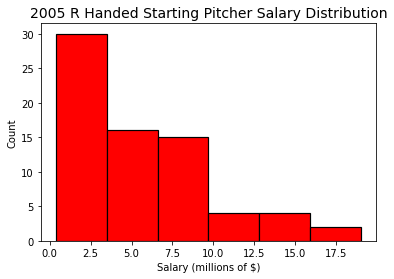

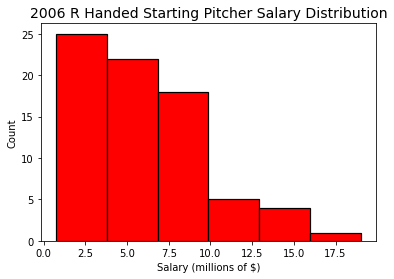

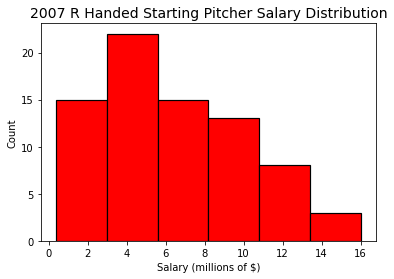

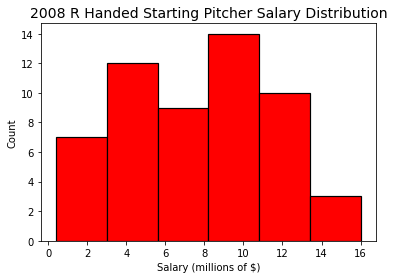

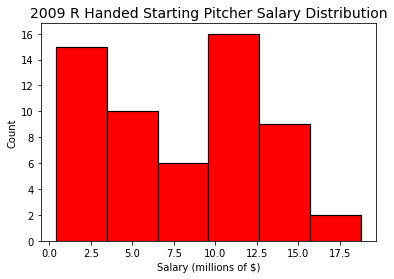

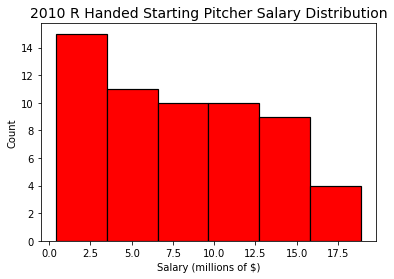

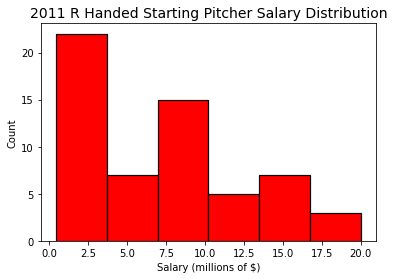

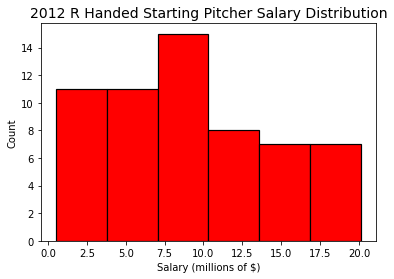

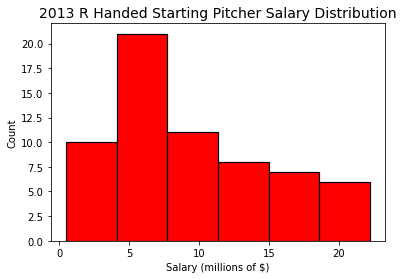

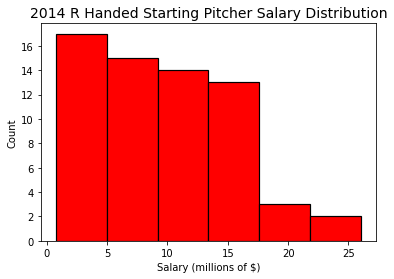

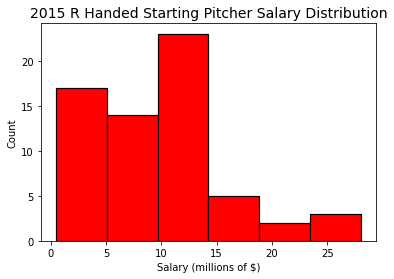

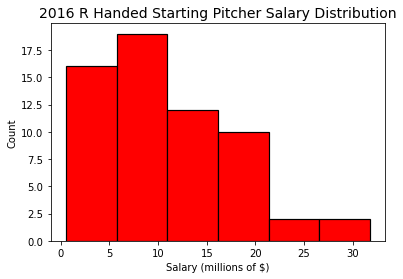

In [45]:
plot(df_right_starter,[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016])

In [46]:
def plot_2(data,year_list):
    for year in year_list:
        plt.hist((data.loc[(data['yearID']==year),'salary']/1e6), bins=6, color='g', edgecolor='black', linewidth=1.2, align='mid')
        plt.xlabel('Salary (millions of $)'), plt.ylabel('Count')
        plt.title('{} L Handed Starting Pitcher Salary Distribution'.format(year), size = 14)
        plt.show()

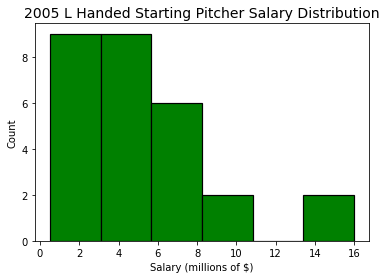

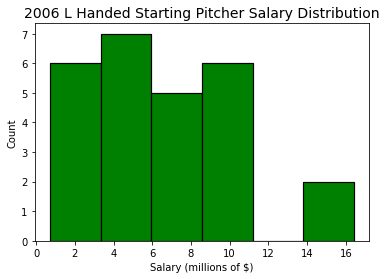

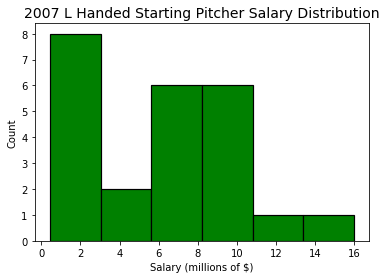

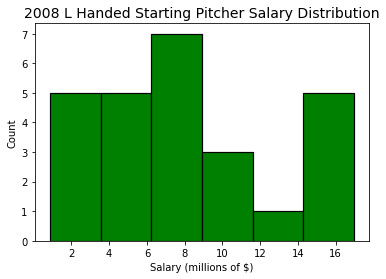

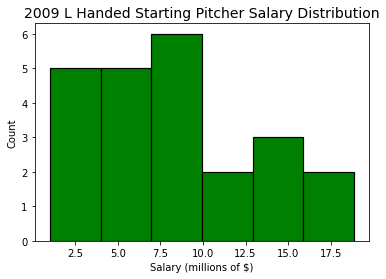

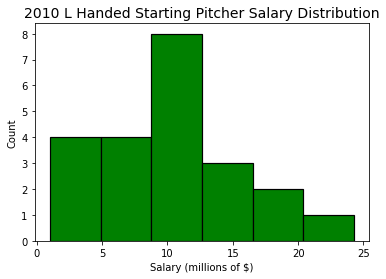

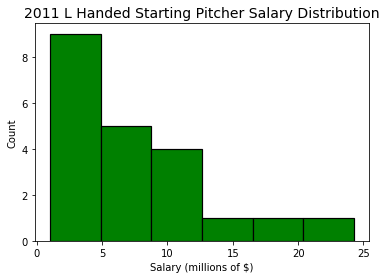

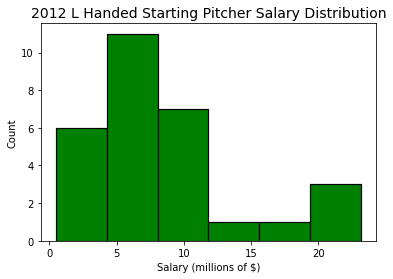

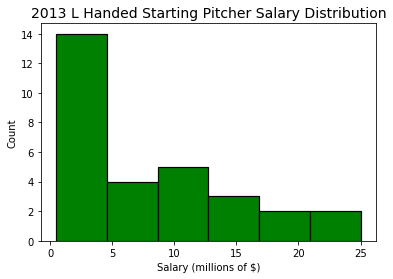

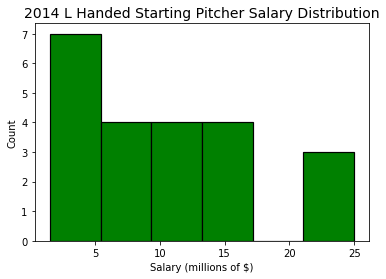

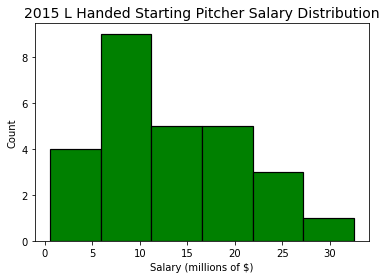

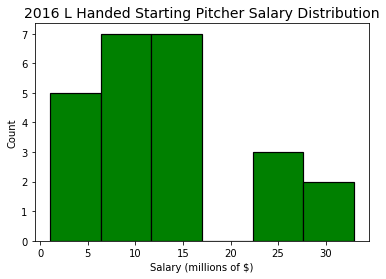

In [47]:
plot_2(df_left_starter,[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016])

Text(0.5, 1.0, 'L Handed Starting Pitcher 2016 Salary Distribution (million)')

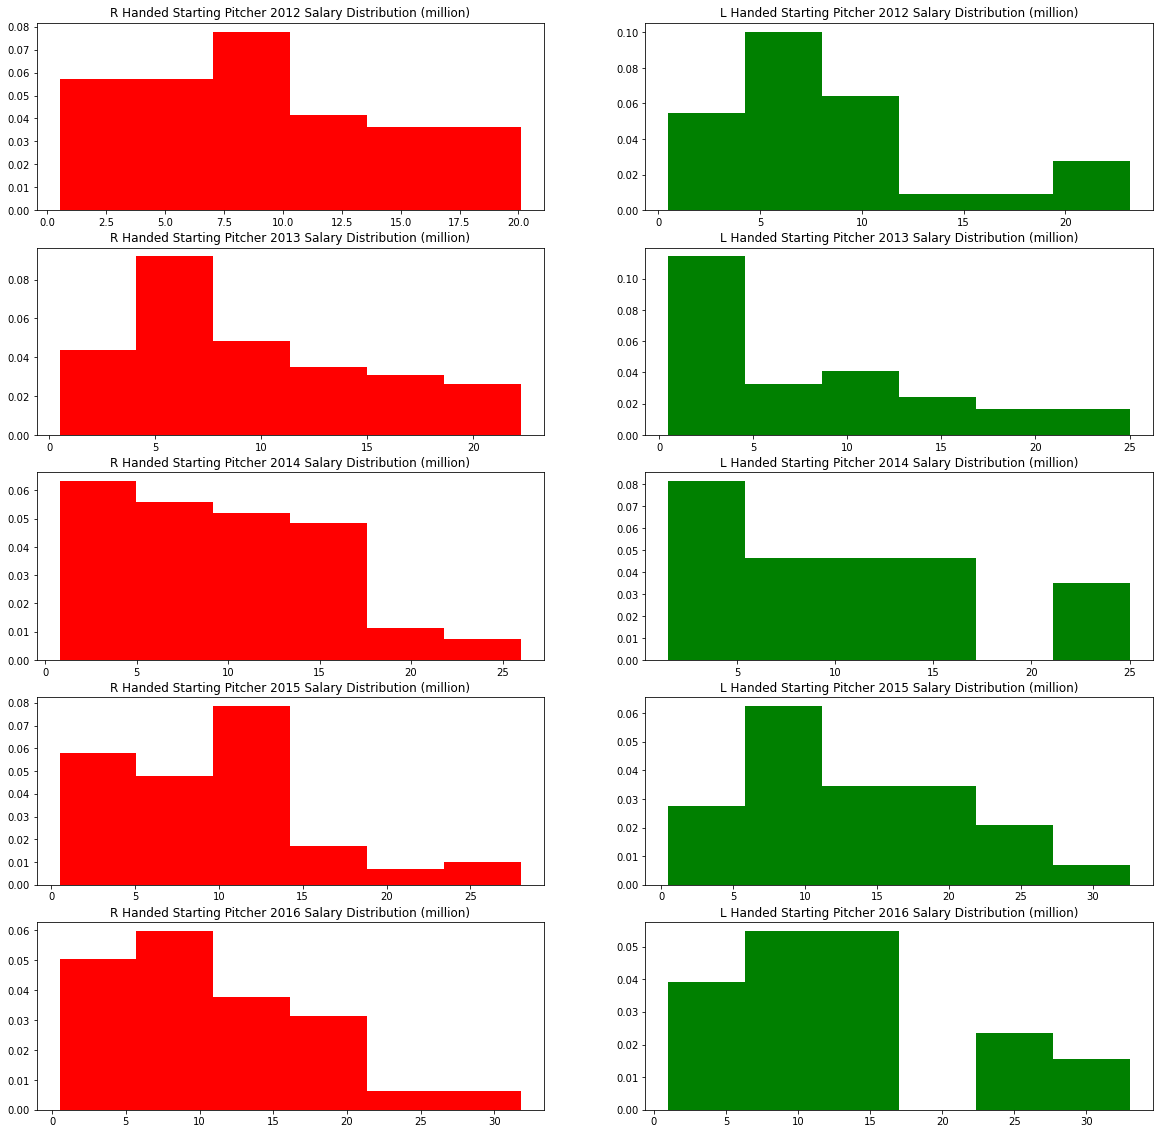

In [48]:
%matplotlib inline
COL_NUM = 2
ROW_NUM = 5
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(20,20))
n_bins=6
ax0, ax1, ax2, ax3,ax4,ax5,ax6,ax7,ax8,ax9 = axes.flatten()

ax0.hist((df_right_starter.loc[(df_right_starter['yearID']==2012),'salary']/1e6), n_bins, density=True, histtype='bar', color='r')
ax0.set_title('R Handed Starting Pitcher 2012 Salary Distribution (million)')
ax1.hist((df_left_starter.loc[(df_left_starter['yearID']==2012),'salary']/1e6), n_bins, density=True, histtype='bar', color='g')
ax1.set_title('L Handed Starting Pitcher 2012 Salary Distribution (million)')

ax2.hist((df_right_starter.loc[(df_right_starter['yearID']==2013),'salary']/1e6), n_bins, density=True, histtype='bar', color='r')
ax2.set_title('R Handed Starting Pitcher 2013 Salary Distribution (million)')
ax3.hist((df_left_starter.loc[(df_left_starter['yearID']==2013),'salary']/1e6), n_bins, density=True, histtype='bar', color='g')
ax3.set_title('L Handed Starting Pitcher 2013 Salary Distribution (million)')

ax4.hist((df_right_starter.loc[(df_right_starter['yearID']==2014),'salary']/1e6), n_bins, density=True, histtype='bar', color='r')
ax4.set_title('R Handed Starting Pitcher 2014 Salary Distribution (million)')
ax5.hist((df_left_starter.loc[(df_left_starter['yearID']==2014),'salary']/1e6), n_bins, density=True, histtype='bar', color='g')
ax5.set_title('L Handed Starting Pitcher 2014 Salary Distribution (million)')

ax6.hist((df_right_starter.loc[(df_right_starter['yearID']==2015),'salary']/1e6), n_bins, density=True, histtype='bar', color='r')
ax6.set_title('R Handed Starting Pitcher 2015 Salary Distribution (million)')
ax7.hist((df_left_starter.loc[(df_left_starter['yearID']==2015),'salary']/1e6), n_bins, density=True, histtype='bar', color='g')
ax7.set_title('L Handed Starting Pitcher 2015 Salary Distribution (million)')

ax8.hist((df_right_starter.loc[(df_right_starter['yearID']==2016),'salary']/1e6), n_bins, density=True, histtype='bar', color='r')
ax8.set_title('R Handed Starting Pitcher 2016 Salary Distribution (million)')
ax9.hist((df_left_starter.loc[(df_left_starter['yearID']==2016),'salary']/1e6), n_bins, density=True, histtype='bar', color='g')
ax9.set_title('L Handed Starting Pitcher 2016 Salary Distribution (million)')



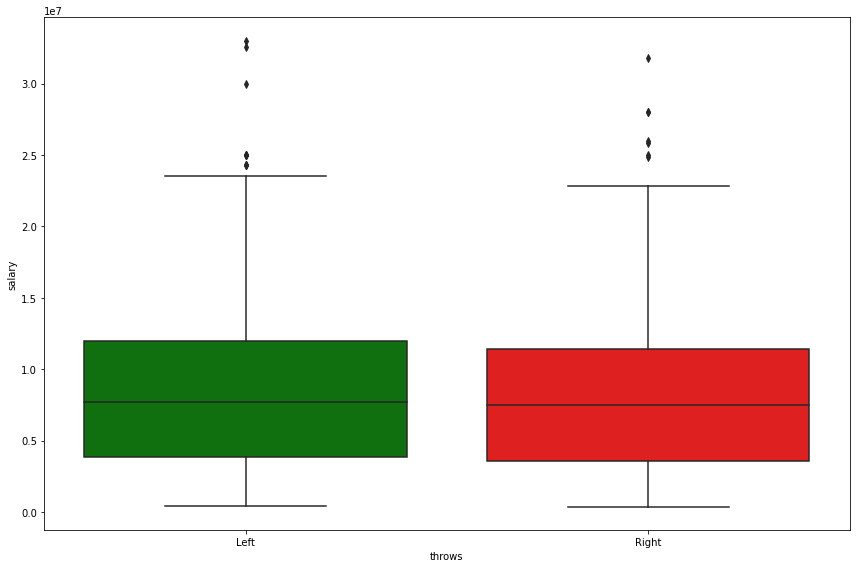

In [49]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df_2_starter["throws"],y=df_2_starter["salary"],data=df_2_starter,palette=["g","r"])
plt.tight_layout()

In [50]:
rs_2005=df_right_starter.loc[(df_right_starter['yearID']==2005),'salary'].mean()
rs_2006=df_right_starter.loc[(df_right_starter['yearID']==2006),'salary'].mean()
rs_2007=df_right_starter.loc[(df_right_starter['yearID']==2007),'salary'].mean()
rs_2008=df_right_starter.loc[(df_right_starter['yearID']==2008),'salary'].mean()
rs_2009=df_right_starter.loc[(df_right_starter['yearID']==2009),'salary'].mean()
rs_2010=df_right_starter.loc[(df_right_starter['yearID']==2010),'salary'].mean()
rs_2011=df_right_starter.loc[(df_right_starter['yearID']==2011),'salary'].mean()
rs_2012=df_right_starter.loc[(df_right_starter['yearID']==2012),'salary'].mean()
rs_2013=df_right_starter.loc[(df_right_starter['yearID']==2013),'salary'].mean()
rs_2014=df_right_starter.loc[(df_right_starter['yearID']==2014),'salary'].mean()
rs_2015=df_right_starter.loc[(df_right_starter['yearID']==2015),'salary'].mean()
rs_2016=df_right_starter.loc[(df_right_starter['yearID']==2016),'salary'].mean()

In [51]:
ls_2005=df_left_starter.loc[(df_left_starter['yearID']==2005),'salary'].mean()
ls_2006=df_left_starter.loc[(df_left_starter['yearID']==2006),'salary'].mean()
ls_2007=df_left_starter.loc[(df_left_starter['yearID']==2007),'salary'].mean()
ls_2008=df_left_starter.loc[(df_left_starter['yearID']==2008),'salary'].mean()
ls_2009=df_left_starter.loc[(df_left_starter['yearID']==2009),'salary'].mean()
ls_2010=df_left_starter.loc[(df_left_starter['yearID']==2010),'salary'].mean()
ls_2011=df_left_starter.loc[(df_left_starter['yearID']==2011),'salary'].mean()
ls_2012=df_left_starter.loc[(df_left_starter['yearID']==2012),'salary'].mean()
ls_2013=df_left_starter.loc[(df_left_starter['yearID']==2013),'salary'].mean()
ls_2014=df_left_starter.loc[(df_left_starter['yearID']==2014),'salary'].mean()
ls_2015=df_left_starter.loc[(df_left_starter['yearID']==2015),'salary'].mean()
ls_2016=df_left_starter.loc[(df_left_starter['yearID']==2016),'salary'].mean()

Text(0.5, 1.0, 'Average Starting Pitcher Salary by hand')

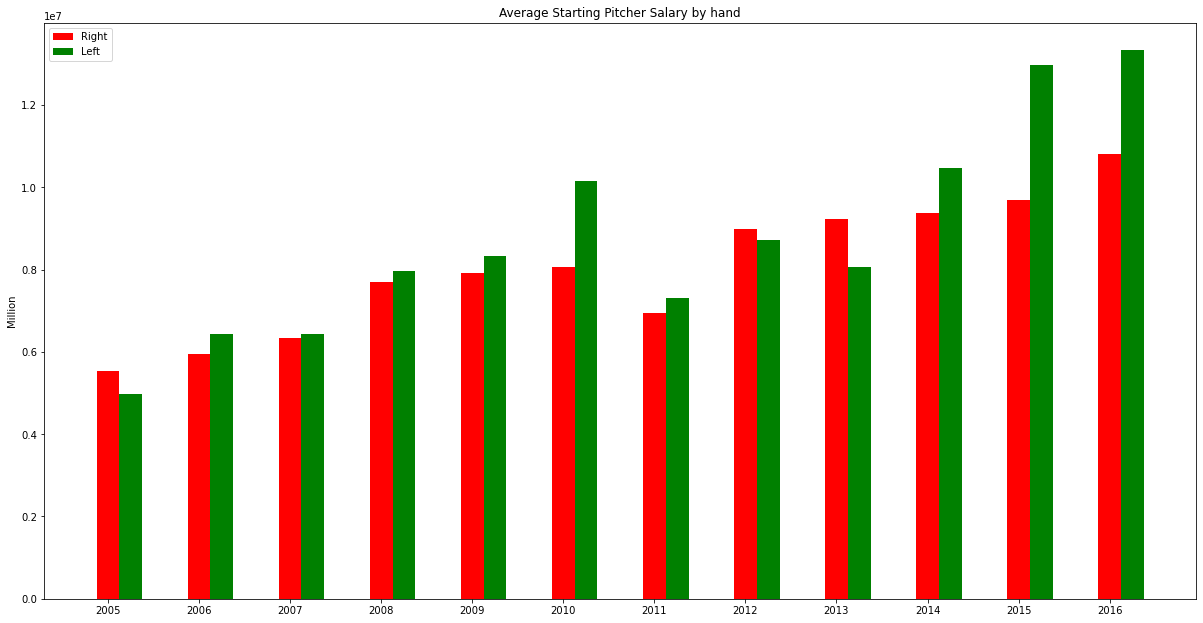

In [52]:
data = [[rs_2005,rs_2006,rs_2007,rs_2008,rs_2009,rs_2010,rs_2011,rs_2012,rs_2013,rs_2014, rs_2015, rs_2016],[ls_2005,ls_2006,ls_2007,ls_2008,ls_2009,ls_2010,ls_2011,ls_2012,ls_2013,ls_2014,ls_2015,ls_2016]]
X = np.arange(12)
fig = plt.figure(figsize=(16,8))
ax = fig.add_axes([0,0,1,1])
plt.xticks(range(12), ['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016'],fontsize=10)
ax.bar(X + 0.00, data[0], color = 'r', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.legend(labels=['Right', 'Left'])
plt.ylabel('Million')
plt.title('Average Starting Pitcher Salary by hand')

In [53]:
start_pitching_r_clean=df_right_starter[['playerID','W','SO','ERA','WHIP','salary']]

In [54]:
start_pitching_l_clean=df_left_starter[['playerID','W','SO','ERA','WHIP','salary']]

In [55]:
rs_twelve_year_average = start_pitching_r_clean.groupby('playerID', as_index=False).mean()

In [56]:
ls_twelve_year_average = start_pitching_l_clean.groupby('playerID', as_index=False).mean()

The correlation between average W over the 12 years and salary is 0.620
The correlation between average SO over the 12 years and salary is 0.665
The correlation between average ERA over the 12 years and salary is -0.345
The correlation between average WHIP over the 12 years and salary is -0.423


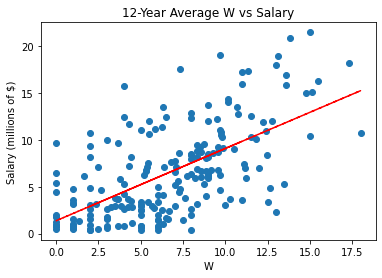

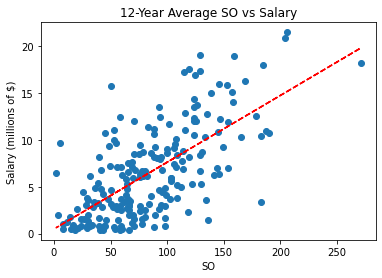

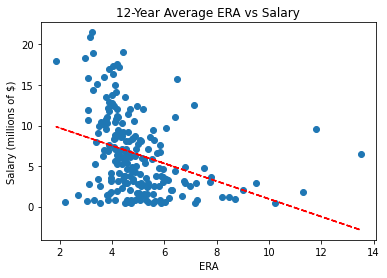

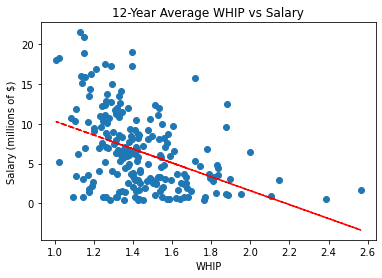

In [57]:
def analyze_12_year_records(record_df, statistics_list):
    for statistic in statistics_list:
        x = record_df[statistic]
        y = record_df['salary'] / 1e6 
        plt.figure()
        plt.scatter(x,y)
        plt.title('12-Year Average {} vs Salary'.format(statistic))
        plt.ylabel('Salary (millions of $)')
        plt.xlabel('{}'.format(statistic))
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        plt.plot(x, p(x), 'r--')
        print('The correlation between average {} over the 12 years and salary is {:0.3f}' \
         .format(statistic, record_df.corr()[statistic]['salary']))

analyze_12_year_records(rs_twelve_year_average, ['W','SO','ERA','WHIP'])


The correlation between average W over the 12 years and salary is 0.688
The correlation between average SO over the 12 years and salary is 0.708
The correlation between average ERA over the 12 years and salary is -0.272
The correlation between average WHIP over the 12 years and salary is -0.337


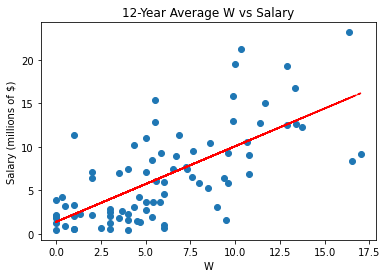

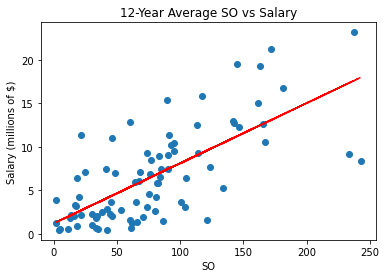

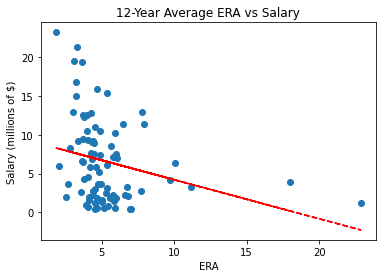

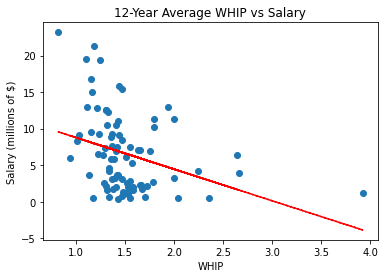

In [58]:
analyze_12_year_records(ls_twelve_year_average, ['W','SO','ERA','WHIP'])

## T test shows there is a contract premium on  left starting pitchers

In [59]:
ttest_ind(df_left_starter['salary'],df_right_starter['salary'])

Ttest_indResult(statistic=1.9210790178286752, pvalue=0.054988701449714864)

## Right & Left Reliever Salary Analysis (2005-2016)

In [60]:
df_right_relief=df_2_relief[(df_2_relief['throws']=='Right')]
df_left_relief=df_2_relief[(df_2_relief['throws']=='Left')]

In [61]:
def plot_3(data,year_list):
    for year in year_list:
        plt.hist((data.loc[(data['yearID']==year),'salary']/1e6), bins=6, color='r', edgecolor='black', linewidth=1.2, align='mid')
        plt.xlabel('Salary (millions of $)'), plt.ylabel('Count')
        plt.title('{} R Handed Reliever Salary Distribution'.format(year), size = 14)
        plt.show()

        

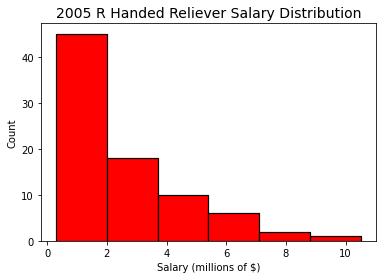

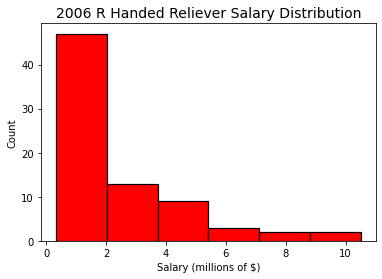

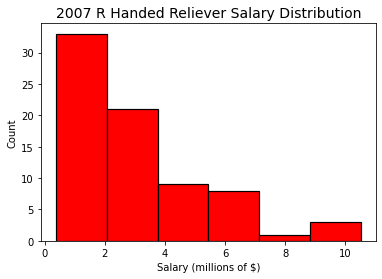

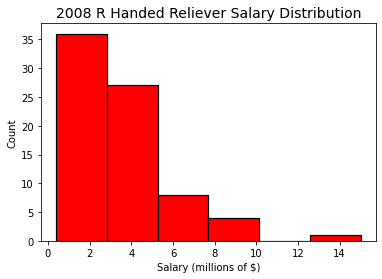

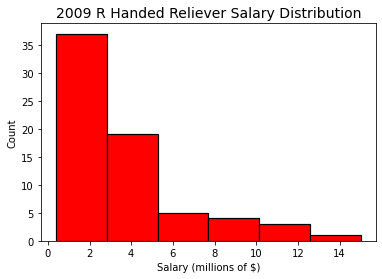

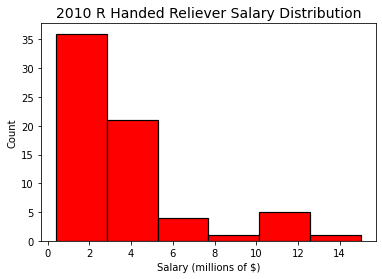

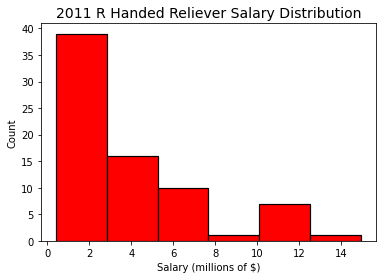

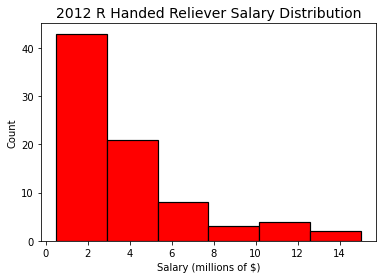

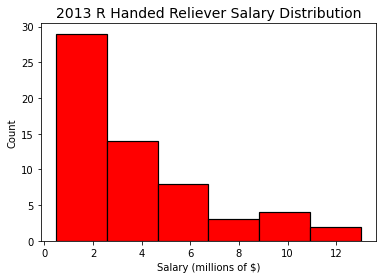

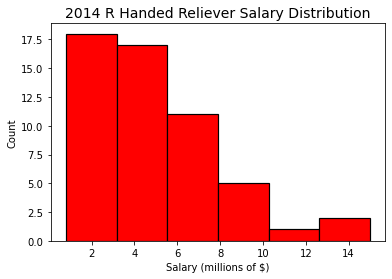

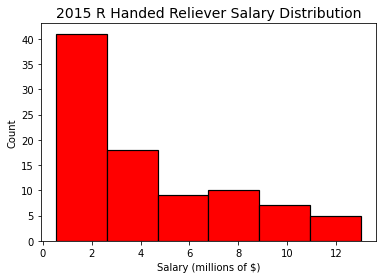

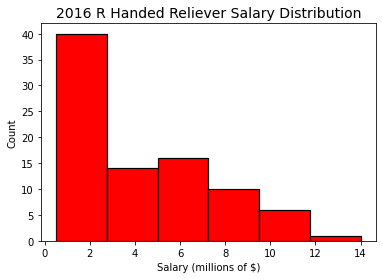

In [62]:
plot_3(df_right_relief,[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016])

In [63]:
def plot_4(data,year_list):
    for year in year_list:
        plt.hist((data.loc[(data['yearID']==year),'salary']/1e6), bins=6, color='g', edgecolor='black', linewidth=1.2, align='mid')
        plt.xlabel('Salary (millions of $)'), plt.ylabel('Count')
        plt.title('{} L Handed Reliever Salary Distribution'.format(year), size = 14)
        plt.show()

        

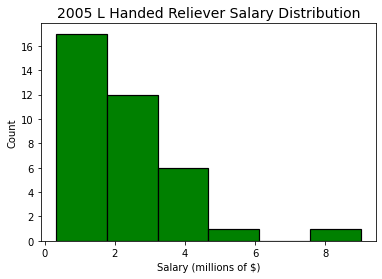

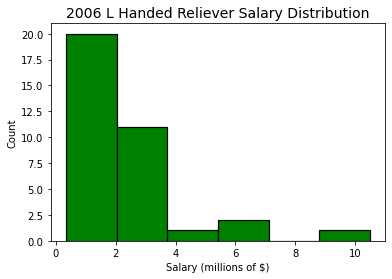

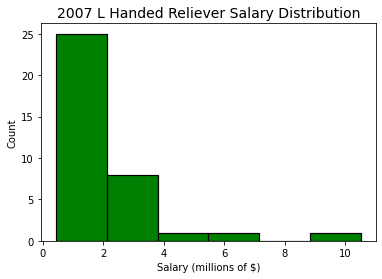

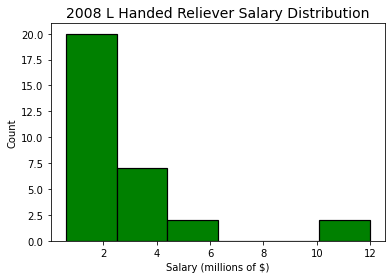

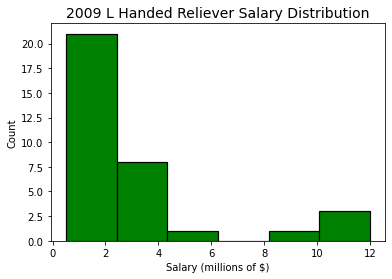

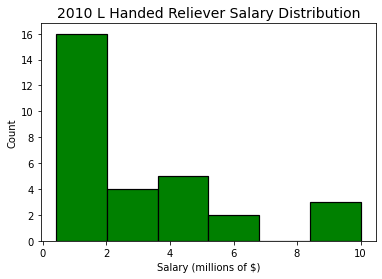

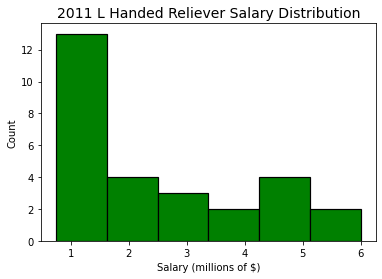

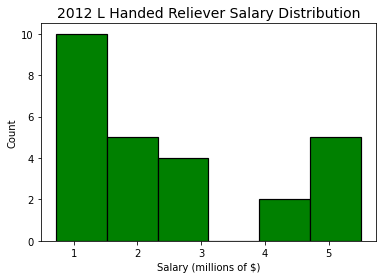

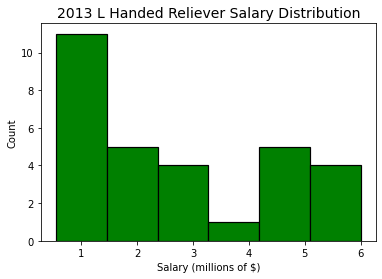

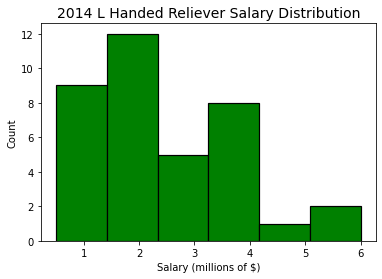

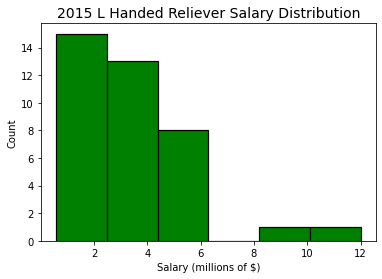

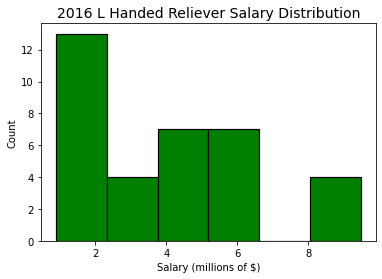

In [64]:
plot_4(df_left_relief,[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016])

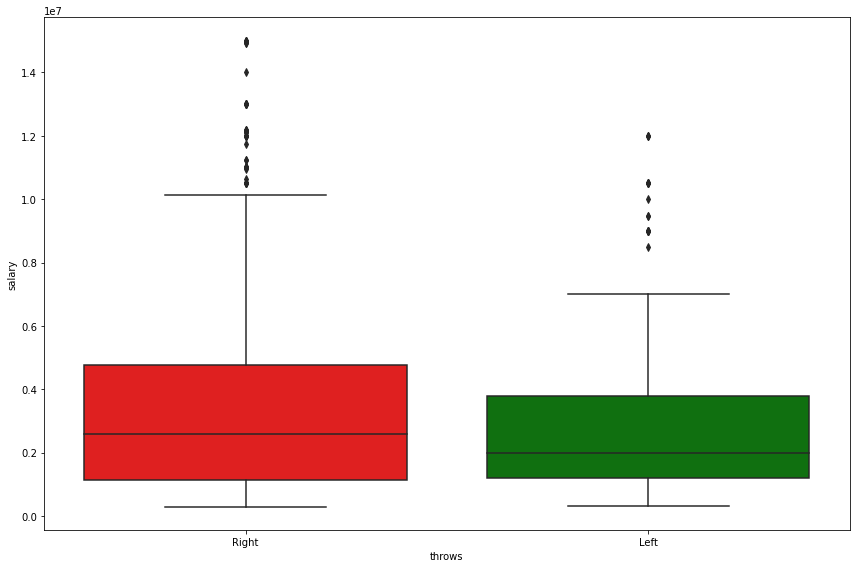

In [65]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df_2_relief["throws"],y=df_2_relief["salary"],data=df_2_relief,palette=["r","g"])
plt.tight_layout()

In [66]:
rr_2005=df_right_relief.loc[(df_right_relief['yearID']==2005),'salary'].mean()
rr_2006=df_right_relief.loc[(df_right_relief['yearID']==2006),'salary'].mean()
rr_2007=df_right_relief.loc[(df_right_relief['yearID']==2007),'salary'].mean()
rr_2008=df_right_relief.loc[(df_right_relief['yearID']==2008),'salary'].mean()
rr_2009=df_right_relief.loc[(df_right_relief['yearID']==2009),'salary'].mean()
rr_2010=df_right_relief.loc[(df_right_relief['yearID']==2010),'salary'].mean()
rr_2011=df_right_relief.loc[(df_right_relief['yearID']==2011),'salary'].mean()
rr_2012=df_right_relief.loc[(df_right_relief['yearID']==2012),'salary'].mean()
rr_2013=df_right_relief.loc[(df_right_relief['yearID']==2013),'salary'].mean()
rr_2014=df_right_relief.loc[(df_right_relief['yearID']==2014),'salary'].mean()
rr_2015=df_right_relief.loc[(df_right_relief['yearID']==2015),'salary'].mean()
rr_2016=df_right_relief.loc[(df_right_relief['yearID']==2016),'salary'].mean()

In [67]:
lr_2005=df_left_relief.loc[(df_left_relief['yearID']==2005),'salary'].mean()
lr_2006=df_left_relief.loc[(df_left_relief['yearID']==2006),'salary'].mean()
lr_2007=df_left_relief.loc[(df_left_relief['yearID']==2007),'salary'].mean()
lr_2008=df_left_relief.loc[(df_left_relief['yearID']==2008),'salary'].mean()
lr_2009=df_left_relief.loc[(df_left_relief['yearID']==2009),'salary'].mean()
lr_2010=df_left_relief.loc[(df_left_relief['yearID']==2010),'salary'].mean()
lr_2011=df_left_relief.loc[(df_left_relief['yearID']==2011),'salary'].mean()
lr_2012=df_left_relief.loc[(df_left_relief['yearID']==2012),'salary'].mean()
lr_2013=df_left_relief.loc[(df_left_relief['yearID']==2013),'salary'].mean()
lr_2014=df_left_relief.loc[(df_left_relief['yearID']==2014),'salary'].mean()
lr_2015=df_left_relief.loc[(df_left_relief['yearID']==2015),'salary'].mean()
lr_2016=df_left_relief.loc[(df_left_relief['yearID']==2016),'salary'].mean()

Text(0.5, 1.0, 'Average Relief Pitcher Salary by hand')

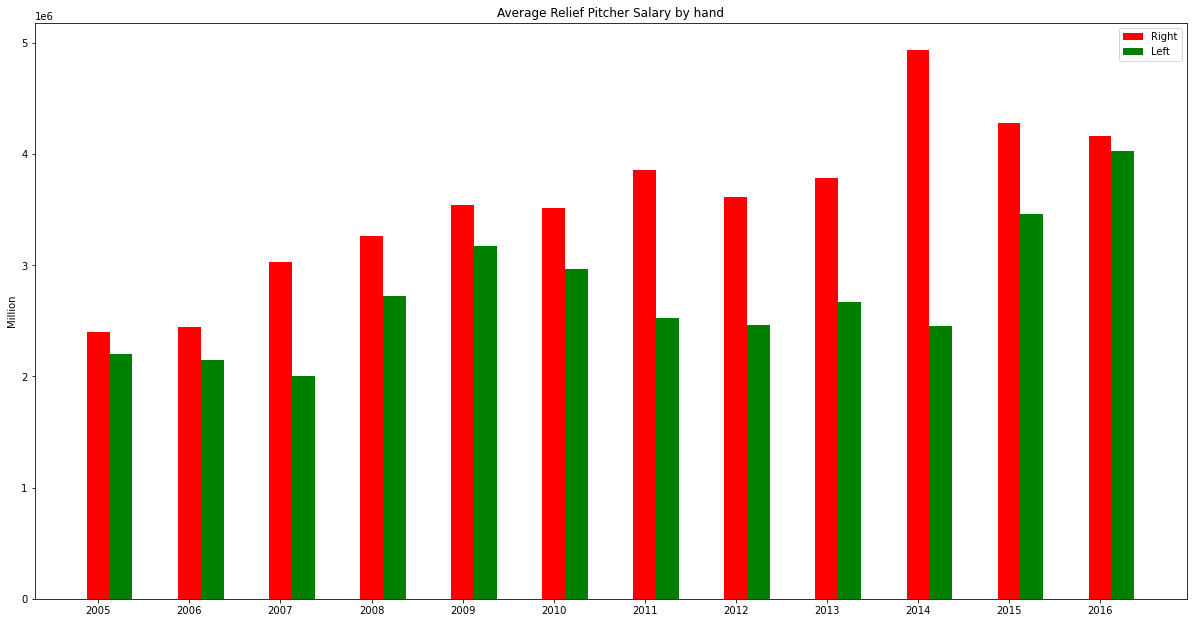

In [68]:
data = [[rr_2005,rr_2006,rr_2007,rr_2008,rr_2009,rr_2010,rr_2011,rr_2012,rr_2013,rr_2014, rr_2015, rr_2016],[lr_2005,lr_2006,lr_2007,lr_2008,lr_2009,lr_2010,lr_2011,lr_2012,lr_2013,lr_2014,lr_2015,lr_2016]]
X = np.arange(12)
fig = plt.figure(figsize=(16,8))
ax = fig.add_axes([0,0,1,1])
plt.xticks(range(12), ['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016'],fontsize=10)
ax.bar(X + 0.00, data[0], color = 'r', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.legend(labels=['Right', 'Left'])
plt.ylabel('Million')
plt.title('Average Relief Pitcher Salary by hand')

In [69]:
relief_pitching_r_clean=df_right_relief[['playerID','W','SO','ERA','WHIP','salary']]

In [70]:
rl_twelve_year_average = relief_pitching_r_clean.groupby('playerID', as_index=False).mean()

The correlation between average W over the 12 years and salary is 0.079
The correlation between average SO over the 12 years and salary is 0.228
The correlation between average ERA over the 12 years and salary is -0.174
The correlation between average WHIP over the 12 years and salary is -0.143


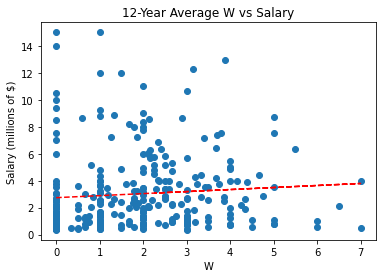

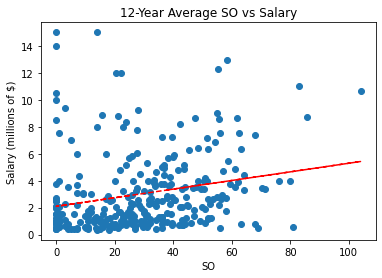

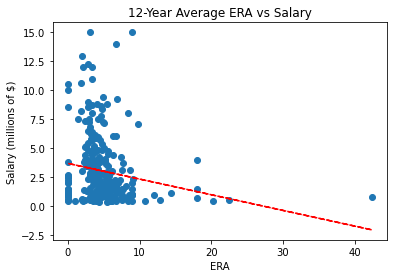

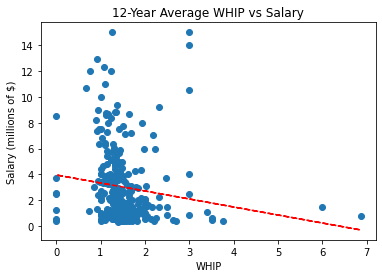

In [71]:
analyze_12_year_records(rl_twelve_year_average, ['W','SO','ERA','WHIP'])

In [72]:
relief_pitching_l_clean=df_left_relief[['playerID','W','SO','ERA','WHIP','salary']]

In [73]:
ll_twelve_year_average = relief_pitching_l_clean.groupby('playerID', as_index=False).mean()

The correlation between average W over the 12 years and salary is 0.192
The correlation between average SO over the 12 years and salary is 0.333
The correlation between average ERA over the 12 years and salary is 0.095
The correlation between average WHIP over the 12 years and salary is 0.011


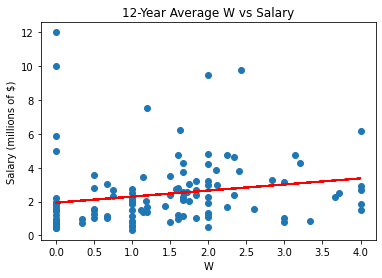

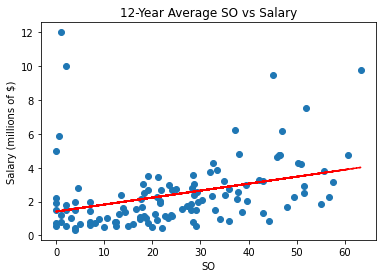

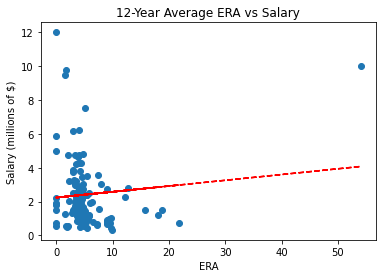

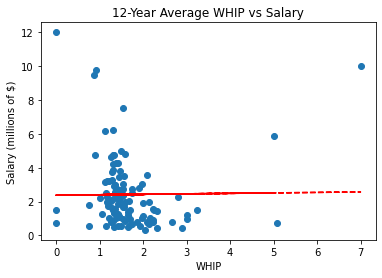

In [74]:
analyze_12_year_records(ll_twelve_year_average, ['W','SO','ERA','WHIP'])

In [75]:
ttest_ind(df_right_relief['salary'],df_left_relief['salary'])

Ttest_indResult(statistic=4.678432959484421, pvalue=3.195766030923037e-06)

## Contract Premium: 950,000 if you are a left handed starter !

In [76]:
df_2_starter['hand']=np.where((df_2_starter['throws']=='Left'),1,0)

<ipython-input-76-fc314572d8d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_starter['hand']=np.where((df_2_starter['throws']=='Left'),1,0)


In [77]:
df_2_starter['diff']=df_2_starter['G']-df_2_starter['GS']


<ipython-input-77-492573c5d018>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_starter['diff']=df_2_starter['G']-df_2_starter['GS']


In [78]:
#df_2_starter=df_2_starter[df_2_starter['diff'] <= df_2_starter['G']*0.2]

In [79]:
df_2_starter['win_percentage']=df_2_starter['W']/(df_2_starter['W']+df_2_starter['L'])
df_2_starter['win_percentage']

<ipython-input-79-efbc3ac1362b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_starter['win_percentage']=df_2_starter['W']/(df_2_starter['W']+df_2_starter['L'])


8106     0.200000
8107     0.333333
8109     0.500000
8111     0.200000
8112     0.666667
           ...   
13336    0.590909
13342    0.500000
13356    0.500000
13360    0.250000
13363    0.562500
Name: win_percentage, Length: 1066, dtype: float64

In [80]:
df_2_starter['lose_percentage']=df_2_starter['L']/(df_2_starter['W']+df_2_starter['L'])
df_2_starter['lose_percentage']

<ipython-input-80-8b000b2f770b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_starter['lose_percentage']=df_2_starter['L']/(df_2_starter['W']+df_2_starter['L'])


8106     0.800000
8107     0.666667
8109     0.500000
8111     0.800000
8112     0.333333
           ...   
13336    0.409091
13342    0.500000
13356    0.500000
13360    0.750000
13363    0.437500
Name: lose_percentage, Length: 1066, dtype: float64

In [81]:
df_2_starter

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,throws,WHIP,salary,Debut,Threshold,hand,diff,win_percentage,lose_percentage
8106,alvarwi01,2005,1,LAN,NL,1,4,21,2,0,0,0,72,31,15,7,7,16,0.316,5.63,0.0,0,0.0,0,109.0,3,15,2.0,2.0,1.0,Left,1.583333,2000000,1989,16,1,19,0.200000,0.800000
8107,anderbr02,2005,1,KCA,AL,1,2,6,6,0,0,0,92,39,23,7,4,17,0.305,6.75,1.0,0,0.0,1,133.0,0,24,0.0,1.0,2.0,Left,1.402174,3250000,1993,12,1,0,0.333333,0.666667
8109,armasto02,2005,1,WAS,NL,7,7,19,19,0,0,0,304,100,56,16,54,59,0.258,4.97,4.0,6,5.0,2,452.0,0,57,4.0,1.0,7.0,Right,1.519737,2260000,1999,6,0,0,0.500000,0.500000
8111,astacpe01,2005,1,TEX,AL,2,8,12,12,0,0,0,201,79,45,13,11,45,0.292,6.04,1.0,3,1.0,1,288.0,0,45,3.0,2.0,3.0,Right,1.343284,800000,1992,13,0,0,0.200000,0.800000
8112,astacpe01,2005,2,SDN,NL,4,2,12,10,0,0,0,179,54,21,4,26,33,0.247,3.17,3.0,3,1.0,0,252.0,1,21,4.0,2.0,5.0,Right,1.340782,800000,1992,13,0,2,0.666667,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13336,wainwad01,2016,1,SLN,NL,13,9,33,33,1,1,0,596,220,102,22,59,161,0.287,4.62,4.0,1,5.0,0,847.0,0,108,8.0,9.0,27.0,Right,1.404362,19500000,2005,11,0,0,0.590909,0.409091
13342,weaveje02,2016,1,LAA,AL,12,12,31,31,1,1,0,534,209,100,37,51,103,0.297,5.06,2.0,1,4.0,2,767.0,0,106,1.0,6.0,19.0,Right,1.460674,20200000,2006,10,0,0,0.500000,0.500000
13356,worleva01,2016,1,BAL,AL,2,2,35,4,0,0,1,260,84,34,11,35,56,0.261,3.53,0.0,3,3.0,0,365.0,13,37,0.0,3.0,12.0,Right,1.373077,2600000,2010,6,0,31,0.500000,0.500000
13360,youngch03,2016,1,KCA,AL,3,9,34,13,0,0,1,266,104,61,28,43,94,0.291,6.19,1.0,3,1.0,0,406.0,7,63,0.0,4.0,3.0,Right,1.657895,4250000,2004,12,0,21,0.250000,0.750000


array([[<AxesSubplot:title={'center':'IPouts'}>]], dtype=object)

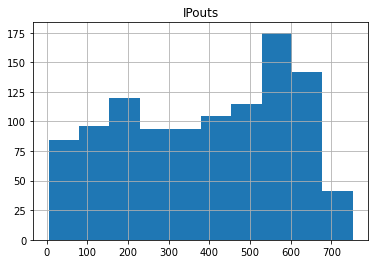

In [82]:
df_2_starter.hist(column="IPouts")


In [83]:
fit = ols('salary ~ C(hand)+W+L+IPouts+BAOpp+BB+SO+SHO+SV+H+ER+HR+IBB+R', data=df_2_starter[df_2_starter['IPouts']>=300]).fit() 
#take out WHIP, Change L to lose percentage
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     11.74
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           1.65e-24
Time:                        15:45:14   Log-Likelihood:                -11469.
No. Observations:                 679   AIC:                         2.297e+04
Df Residuals:                     664   BIC:                         2.304e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.387e+06   8.75e+06      0.158      0.874   -1.58e+07    1.86e+07
C(hand)[T.1]  9.958e+05   4.66e+05      2.138      0.033    8.13e+04    1.91e+06
W            -6.834e+04   9.83e+04     -0.695      0.487   -2.61e+05    1.25e+05
L            -1.583e+05   1.06e+05     -1.486      0.138   -3.67e+05    5.09e+04
IPouts        4299.1977    1.5e+04      0.287      0.774   -2.51e+04    3.37e+04
BAOpp         2.122e+07   3.33e+07      0.637      0.524   -4.42e+07    8.66e+07
BB           -3.647e+04   1.78e+04     -2.050      0.041   -7.14e+04   -1542.732
SO            6.396e+04   8893.943      7.191      0.000    4.65e+04    8.14e+04
SHO           1.021e+05   2.99e+05      0.342      0.733   -4.85e+05    6.89e+05
SV           -6.469e+05    1.2e+06     -0.541      0.589      -3e+06     1.7e+06
H            -2.387e+04   4.48e+04     -0.533      0.594   -1.12e+05     6.4e+04
ER            5.822e+04   6.43e+04      0.906      0.365    -6.8e+04    1.84e+05
HR           -7.891e+04   4.63e+04     -1.703      0.089    -1.7e+05    1.21e+04
IBB          -1.926e+05   9.42e+04     -2.045      0.041   -3.77e+05   -7709.479
R            -3.209e+04   6.11e+04     -0.526      0.599   -1.52e+05    8.78e+04
==============================================================================
Omnibus:                       40.019   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.498
Skew:                           0.580   Prob(JB):                     8.00e-11
Kurtosis:                       3.545   Cond. No.                     1.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""